# Paper Plots

This document attempts to collect all relevant data and plots required for the KN efficiency paper

First load all the packages, etc. needed:

In [60]:
import numpy as np
from glob import glob
import os
import des_utils
import des_io
import trigColors
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'
import matplotlib.transforms as transforms
from astropy.io import ascii
import csv
import datetime
import time
reload(des_utils)
reload(trigColors)

<module 'trigColors' from 'trigColors.pyc'>

In [61]:
rickfile = '../OUT_KNANA_DATA_20150928.KNTABLE.TEXT'
rickdata_raw = np.genfromtxt(rickfile,skip_header=5,names=True,dtype=None)
deepsel = (rickdata_raw['FIELD'] == 'C3') | (rickdata_raw['FIELD'] == 'X3')
rickdata_s = rickdata_raw[~deepsel]
rickdata_d = rickdata_raw[deepsel]
rickdata = [rickdata_s,rickdata_d]
print rickdata_raw[rickdata_raw['CID'] == 1230305]

[ ('SN:', 1230305, 'C2', 1, 0, 54.13011, -28.400586, 0.0104223, -9.0, -9.0, -9.0, -9.0, 0, 4, -11, 151, -4, 55, 4, 1.6653, 31.143, 0.3968, 0.8849, 0.1669, 56547.254, 16.873, 4.4542, -9.0, 30.844, 1.8262, 56547.256, 37.631, 6.4206, 0.58, 30.877, 1.919, 56547.259, 36.466, 7.1324, 0.63, 31.143, 1.6653, 56547.261, 42.524, 8.7126, 0.91, 31.535, 1.57945, -28.401, 0, 0, -9, 0, 0, 0.0, 0, 0, -9, 0, 0, 56558.236, 17.713, 8.811, -9.0, 31.122, 1.2984, 56558.239, 45.865, 9.4728, -9.0, 31.556, 1.29968, 777, 1)]


Grab all the data:

In [64]:
reload(des_utils)
reload(trigColors)
SNpath = "../DESY1_KNtrigger_SNEFF1_BIG/*DAT"
KNpath = '../KNSimDataHubble092115/ZD092115_ASCII/*DAT'
datapath = "../DESY1_numepoch1_iz_real_text/*dat"
hostaccfile_s = '../hostMatching/Hostless_KN_DES_SVA1_C1.txt'
hostaccfile_d = '../hostMatching/Hostless_KN_DES_SVA1_X3.txt'
hostaccfiles = [hostaccfile_s,hostaccfile_d]
datatypes = ['KN','SN','data']
filetypes = ['sim','sim','data']
paths = [KNpath,SNpath, datapath]
fieldtypes = ['shallow','deep']
followmin = 3
followmax = 10
dict1 = dict()
for f,datatype in enumerate(datatypes):  
    for n,fieldtype in enumerate(fieldtypes):
        dict1[datatype+'_'+fieldtype] = trigColors.trigColors(paths[f],filetypes[f],fieldtype,SNRand=1)
        dict1[datatype+'_'+fieldtype]['detections'] = des_utils.get_detection_flags_list(dict1[datatype+'_'+fieldtype]['cnites'],
                                                                                        dict1[datatype+'_'+fieldtype]['zbandinfo'],
                                                                                        dict1[datatype+'_'+fieldtype]['ibandinfo'],
                                                                                       followmin,followmax,1)
        if datatype == 'data':
            dict1[datatype+'_'+fieldtype]['HOSTGAL_PHOTOZ'],dict1[datatype+'_'+fieldtype]['DLR'],dict1[datatype+'_'+fieldtype]['SEP'] = des_utils.hostgalAssociate(headerlist=dict1[datatype+'_'+fieldtype]['headers'],
                                                                              datatype=filetypes[f])
        elif datatype == 'KN':
            dict1[datatype+'_'+fieldtype]['HOSTGAL_PHOTOZ'],dict1[datatype+'_'+fieldtype]['DLR'],dict1[datatype+'_'+fieldtype]['SEP'] = des_utils.hostgalAssociate(infile=hostaccfiles[n], headerlist=dict1[datatype+'_'+fieldtype]['headers'],
                                                                              datatype=filetypes[f])
        else:
            dict1[datatype+'_'+fieldtype]['HOSTGAL_PHOTOZ'],dict1[datatype+'_'+fieldtype]['SEP'] = des_utils.hostgalAssociate(headerlist=dict1[datatype+'_'+fieldtype]['headers'],
                                                                              datatype=filetypes[f])
        

In [ ]:
print (4096 & 1016)
            

In [65]:
onefield = np.zeros(len(dict1['data_deep']['zbandinfo']),dtype=bool)
for i,eye in enumerate(dict1['data_deep']['zbandinfo']):
    fld1 = np.unique(eye[5])
    fld2 = np.unique(dict1['data_deep']['ibandinfo'][i][5])
    fld3 = np.unique(dict1['data_shallow']['ibandinfo'][i][5])
    fld4 = np.unique(dict1['data_shallow']['zbandinfo'][i][5])
    flds = np.union1d(fld4,np.union1d(fld3,np.union1d(fld2,fld1)))
    onefield[i] = len(flds) == 1

[1190920 1217917 1223737 1229131 1229818 1298634]
[]
pos shallow
1190920 [array([56575])]
pos shallow
1217917 [ array([56559, 56594, 56614, 56615, 56635, 56645, 56649, 56660, 56675, 56686])]
pos shallow
1223737 [array([56660])]
pos shallow
1229131 [array([56536])]
pos shallow
1229818 [array([56692])]
pos shallow
1298634 [array([56538])]
[1169228 1174853 1175604 1181405]
[1167936 1181366 1183748 1260360]
pos deep
1169228 [ array([ 56575.,  56576.,  56591.,  56602.,  56611.,  56625.,  56636.,
        56648.,  56649.,  56660.,  56661.,  56668.])]
pos deep
1174853 [array([ 56575.,  56576.,  56602.])]
pos deep
1175604 [array([ 56575.,  56576.])]
pos deep
1181405 [array([ 56602.])]
neg deep
1167936 []
neg deep
1181366 []
neg deep
1183748 []
neg deep
1260360 []


/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:149: RuntimeWarning: invalid value encountered in greater


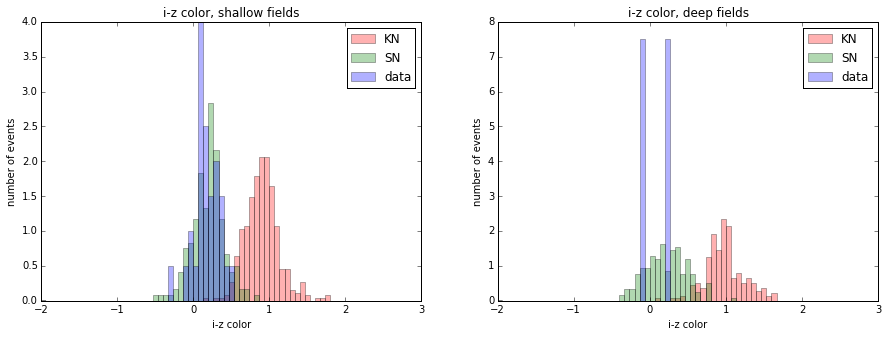

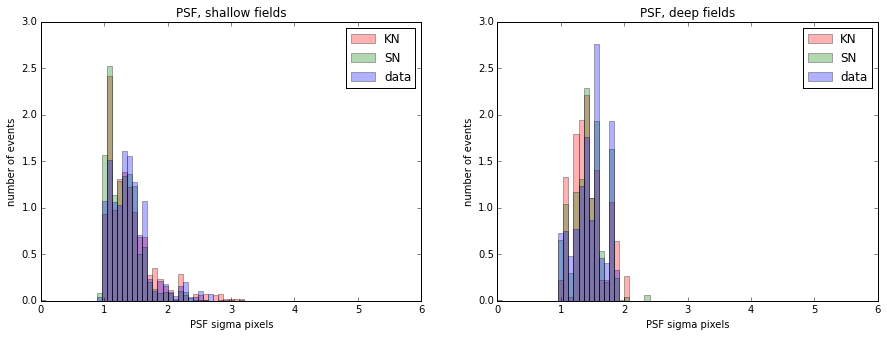

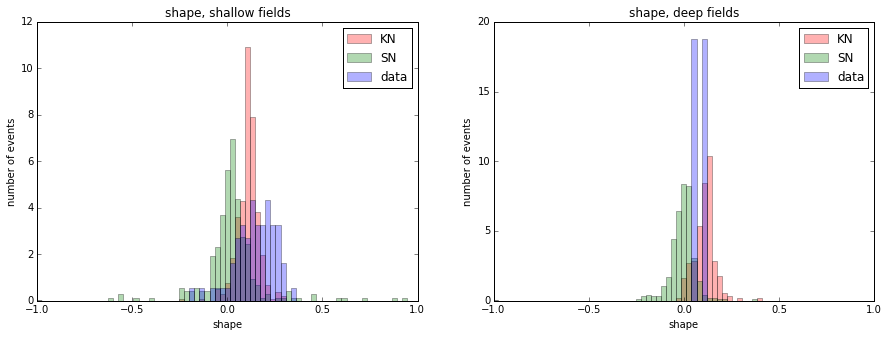

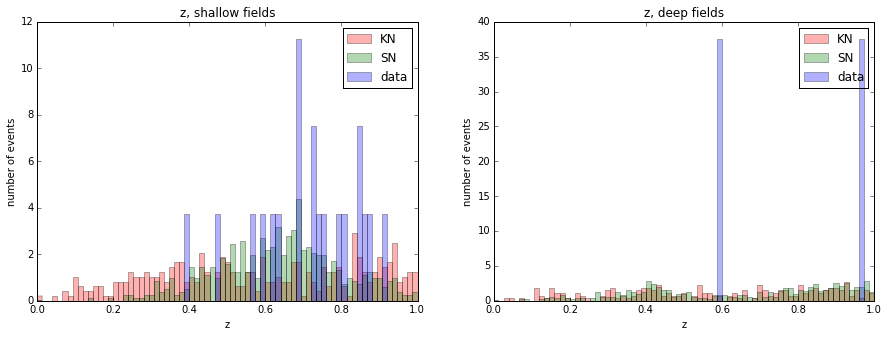

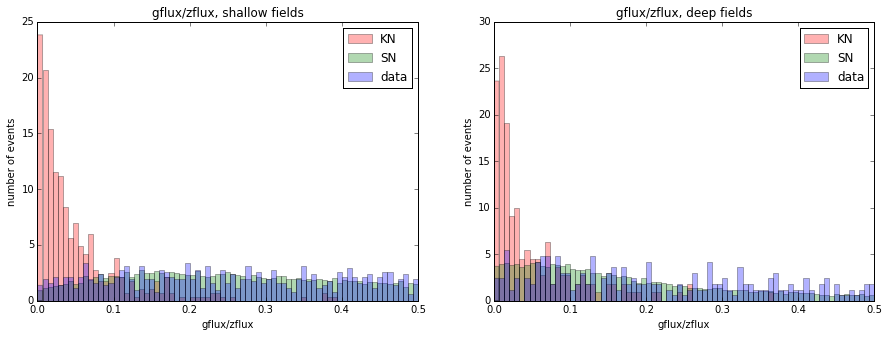

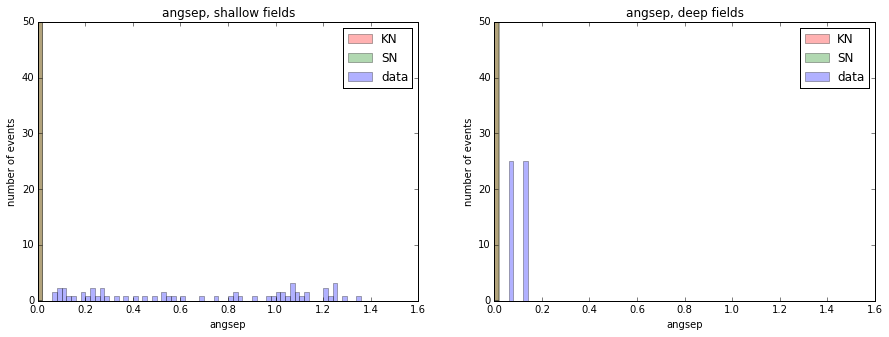

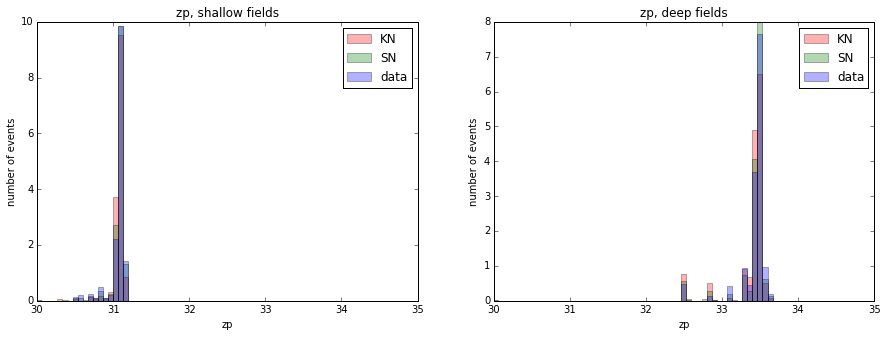

In [69]:
reload(trigColors)
reload(des_utils)
import sys
plotcolorlist = ['r','g','b']
trigseplim = 20 #days
colorlim =0.5
seplim = 2
dlrlim = 2
zlim = 0.1
angsepmax = 0.6
priorminnites = 2
priormaxnites = 14
laterminnites = 20
latermaxnites = 100
zslopelim1 = 0.0
zslopelim2 = 0.0
zpmax_s = 50
zpmax_d = 50
PSFmax = 2./(2.355*.27) # 1.5 arcsec converted to sigma pixel
maxgzratio = 0.15
M_solar = [0.001,0.01,0.1]
beta = [0.1,0.2,0.3]
trigname = 'i+z trigger'
psfname = 'trigger PSF(i,z) < ' + str(PSFmax*(2.355*.27)) + ' arcsec'
noRGname = 'no g det on trig nite'
zpname = 'zp < ' + str(zpmax_s) + ' (s), ' + str(zpmax_d) + ' (d)'
gzrationame = 'gflux/zflux < ' + str(maxgzratio)
followupname = '2nd obs ' + str(followmin) + ' to ' + str(followmax) + 'days after trig'
priorobsname = 'obs ' + str(priorminnites) + ' to ' + str(priormaxnites) + 'days before trig'
priordetname = 'no det ' + str(priorminnites) + ' to ' + str(priormaxnites) + ' days before trig'
laterobsname = 'obs ' + str(laterminnites) + ' to ' + str(latermaxnites) + 'days after trig' 
angsepname = 'angsep < ' + str(angsepmax) + ' arcsec'
timescalename = 'no det > ' + str(trigseplim) + ' days after trig'
zvetoname = 'veto z > ' + str(zlim) 
shapename = 'shape < ' + str(zslopelim1)
colorname = 'i-z color > ' + str(colorlim)

cuts = np.array([trigname,
                 zpname,
                 psfname,
                 gzrationame,
                 followupname,
                 priorobsname,
                 laterobsname,
                 priordetname,
                 timescalename,
                 zvetoname,
                 shapename,
                 angsepname,
                 colorname])

keynames = np.array(['trigs','zp', 'PSF','gzratio','followup','priorobs','laterobs','priordet','timescale','zveto','shape','angsep','color'])

outputdata_s = np.empty([len(cuts),len(datatypes)],dtype=int)
outputdata_d = np.empty([len(cuts),len(datatypes)],dtype=int)
outputdata=[outputdata_s,outputdata_d]

outputtable_s = np.empty([len(cuts)+1,len(datatypes)+1],dtype=object)
outputtable_d = np.empty([len(cuts)+1,len(datatypes)+1],dtype=object)
outputtable=[outputtable_s,outputtable_d]
outputtable[0][0,0] = 'cuts'
outputtable[1][0,0] = 'cuts'
for n,fieldtype in enumerate(fieldtypes): 
    outputtable[n][0,1:] = datatypes
    outputtable[n][1:,0] = cuts
    
colorFig = plt.figure(figsize=(15,5))
colorax_s = colorFig.add_subplot(121)
colorax_d = colorFig.add_subplot(122)
colorax = [colorax_s,colorax_d]
PSFFig = plt.figure(figsize=(15,5))
PSFax_s = PSFFig.add_subplot(121)
PSFax_d = PSFFig.add_subplot(122)
PSFax = [PSFax_s,PSFax_d]
shapeFig = plt.figure(figsize=(15,5))
shapeax_s = shapeFig.add_subplot(121)
shapeax_d = shapeFig.add_subplot(122)
shapeax = [shapeax_s,shapeax_d]
zFig = plt.figure(figsize=(15,5))
zax_s = zFig.add_subplot(121)
zax_d = zFig.add_subplot(122)
zax = [zax_s,zax_d]
gzFig = plt.figure(figsize=(15,5))
gzax_s = gzFig.add_subplot(121)
gzax_d = gzFig.add_subplot(122)
gzax = [gzax_s,gzax_d]
angsepFig = plt.figure(figsize=(15,5))
angsepax_s = angsepFig.add_subplot(121)
angsepax_d = angsepFig.add_subplot(122)
angsepax = [angsepax_s,angsepax_d]
zpFig = plt.figure(figsize=(15,5))
zpax_s = zpFig.add_subplot(121)
zpax_d = zpFig.add_subplot(122)
zpax = [zpax_s,zpax_d]

ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
openfile = open('outputfiles/debuglist_'+st,'w')
for n,fieldtype in enumerate(fieldtypes):  
    for f,filetype in enumerate(datatypes):
        trigsel = dict1[filetype+'_'+fieldtype]['trigs']
        detsel = dict1[filetype+'_'+fieldtype]['detections']       
        trignites = dict1[filetype+'_'+fieldtype]['cnites']
        colors= dict1[filetype+'_'+fieldtype]['colors']
        z = dict1[filetype+'_'+fieldtype]['HOSTGAL_PHOTOZ']
        zbandinfo = dict1[filetype+'_'+fieldtype]['zbandinfo']
        ibandinfo = dict1[filetype+'_'+fieldtype]['ibandinfo']
        rbandinfo = dict1[filetype+'_'+fieldtype]['rbandinfo']
        gbandinfo = dict1[filetype+'_'+fieldtype]['gbandinfo']
        headers = np.array(dict1[filetype+'_'+fieldtype]['headers'])

        PSFlist,PSFsel = trigColors.get_PSFsel(zbandinfo,ibandinfo,trignites,PSFmax)
        
        nitediffs,nitediffsel = trigColors.get_nitediff(zbandinfo,ibandinfo,rbandinfo,zbandinfo,trigseplim)

        gzratio,gzcutsel = trigColors.get_gzcutsel(zbandinfo,gbandinfo,trignites,maxgzratio)
        #gzax[n].hist(gzratio,range=(-.1,0.5),bins=75,alpha=0.3,color=plotcolorlist[f],normed=True)
        
        zsel = z < zlim
        if filetype == 'SN':
            hostgalsel = zsel
        else:
            dlr = dict1[filetype+'_'+fieldtype]['DLR']
            dlrsel = dlr > dlrlim
            sep = dict1[filetype+'_'+fieldtype]['SEP']
            sepsel = sep > seplim
            hostgalsel = zsel | sepsel | dlrsel 
            
        zslopes,zslopes2,zslopesel,zslopesel2 = trigColors.get_slopes(zbandinfo,trignites,zslopelim1,zslopelim2)
        
        angsep,angsepsel = trigColors.get_angsep(headers,angsepmax)
        
        noRGsel = trigColors.get_noRGtrigsel(rbandinfo,gbandinfo,trignites)
        
        priorobssel = trigColors.get_priorobssel(zbandinfo,ibandinfo,rbandinfo,gbandinfo,trignites,priorminnites,priormaxnites)
        
        priordetsel = trigColors.get_priordetsel(zbandinfo,ibandinfo,rbandinfo,gbandinfo,trignites,priorminnites,priormaxnites)
        
        laterobssel = trigColors.get_priorobssel(zbandinfo,ibandinfo,rbandinfo,gbandinfo,trignites,laterminnites,latermaxnites)
        
        if fieldtype == 'shallow':
            zpmax = zpmax_s
        else:
            zpmax = zpmax_d
        zp,zpsel = trigColors.get_zpcutsel(zbandinfo,ibandinfo,trignites,zpmax)

        firsttrigSNRsel = trigColors.get_firsttrigSNRsel(ibandinfo,zbandinfo,trignites,fieldtype)
        
        colorsel = colors > colorlim
        
        selectordict = dict()
        if filetype == 'data':
            selectordict['trigs'] = trigsel & firsttrigSNRsel & onefield   
        else:
            selectordict['trigs'] = trigsel & firsttrigSNRsel
        selectordict['followup'] = detsel
        selectordict['PSF'] = PSFsel
        selectordict['priorobs'] = priorobssel
        selectordict['priordet'] = priordetsel
        selectordict['laterobs'] = priorobssel
        selectordict['color'] = colorsel
        selectordict['shape'] = zslopesel
        selectordict['zveto'] = hostgalsel
        selectordict['timescale'] = nitediffsel
        selectordict['angsep'] = angsepsel
        selectordict['noRG'] = noRGsel
        selectordict['gzratio'] = gzcutsel
        selectordict['zp'] = zpsel
        
        
        sel = np.ones(len(colorsel),dtype=bool)
        total = np.sum(trigsel)
        for c,cut in enumerate(cuts):
            if keynames[c] == 'PSF':
                PSFax[n].hist(PSFlist[sel]*(2.355*.27),range=(0,6),bins=75,alpha=0.3,color=plotcolorlist[f],normed=True)
            if keynames[c] == 'color':
                colorax[n].hist(colors[sel],range=(-2,3),bins=75,alpha=0.3,color=plotcolorlist[f],normed=True)
            if keynames[c] == 'shape':
                shapeax[n].hist(zslopes[sel],range=(-1,1),bins=75,alpha=0.3,color=plotcolorlist[f],normed=True)
            if keynames[c] == 'zveto':
                zax[n].hist(z[sel],range=(0,1),bins=75,alpha=0.3,color=plotcolorlist[f],normed=True)
            if keynames[c] == 'gzratio':
                gzax[n].hist(gzratio[sel],range=(0,0.5),bins=75,alpha=0.3,color=plotcolorlist[f],normed=True)
            if keynames[c] == 'angsep':
                angsepax[n].hist(angsep[sel],range=(0,1.5),bins=75,alpha=0.3,color=plotcolorlist[f],normed=True)
            if keynames[c] == 'zp':
                zpax[n].hist(zp[sel],range=(30,35),bins=75,alpha=0.3,color=plotcolorlist[f],normed=True)
            sel = sel & selectordict[keynames[c]]
            if filetype == 'data' and c==0:
                SNIDlist = np.array([int(header['SNID']) for header in headers[sel]])
                rickSNID = rickdata[n]['CID'][(rickdata[n]['LASTCUT_PASS'] >= 2) & (rickdata[n]['NFIELD_OVP'] < 2)]
                #falsepos = [int(snid) for snid in SNIDlist if not snid in rickSNID]
                falsepos = SNIDlist[~np.in1d(SNIDlist,rickSNID)]
                falseneg = rickSNID[~np.in1d(rickSNID,SNIDlist)]
                print falsepos
                print falseneg
                openfile.write(fieldtype+ ' ZD:\n')
                for pos in falsepos:
                    print 'pos ' + fieldtype
                    print pos, trignites[sel][SNIDlist == pos]
                    openfile.write(str(pos)+'\n')
                openfile.write(fieldtype+ ' RK:\n')
                for neg in falseneg:
                    print 'neg ' + fieldtype
                    print neg, trignites[sel][SNIDlist == neg]
                    openfile.write(str(neg)+'\n')

            tot = np.sum(sel)
            outputdata[n][c,f] = tot
            outputtable[n][c+1,f+1] = str(tot) + ' (' + str(np.around(float(tot)/total,decimals=3)) + ')'
            
        
    colorax[n].set_title('i-z color, '+fieldtype+' fields')
    colorax[n].set_xlabel('i-z color')
    colorax[n].set_ylabel('number of events')
    colorax[n].legend(datatypes)
    shapeax[n].set_title('shape, '+fieldtype+' fields')
    shapeax[n].set_xlabel('shape')
    shapeax[n].set_ylabel('number of events')
    shapeax[n].legend(datatypes)
    PSFax[n].set_title('PSF, '+fieldtype+' fields')
    PSFax[n].set_xlabel('PSF sigma pixels')
    PSFax[n].set_ylabel('number of events')
    PSFax[n].legend(datatypes)
    zax[n].set_title('z, '+fieldtype+' fields')
    zax[n].set_xlabel('z')
    zax[n].set_ylabel('number of events')
    zax[n].legend(datatypes)
    gzax[n].set_title('gflux/zflux, '+fieldtype+' fields')
    gzax[n].set_xlabel('gflux/zflux')
    gzax[n].set_ylabel('number of events')
    gzax[n].legend(datatypes)
    angsepax[n].set_title('angsep, '+fieldtype+' fields')
    angsepax[n].set_xlabel('angsep')
    angsepax[n].set_ylabel('number of events')
    angsepax[n].legend(datatypes)
    zpax[n].set_title('zp, '+fieldtype+' fields')
    zpax[n].set_xlabel('zp')
    zpax[n].set_ylabel('number of events')
    zpax[n].legend(datatypes)
        
openfile.close()


In [ ]:
print np.sum(zpsel)

In [ ]:
import csv
import datetime
import time
ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

print '**** shallow fields ****'
for l in range(0,len(outputtable[0][:,0])):
    print outputtable[0][l,0].ljust(35), 
    print outputtable[0][l,1].ljust(20), 
    print outputtable[0][l,2].ljust(20),
    print outputtable[0][l,3].ljust(20)
print '**** deep fields ****'
for l in range(0,len(outputtable[0][:,0])):
    print outputtable[1][l,0].ljust(35), 
    print outputtable[1][l,1].ljust(20), 
    print outputtable[1][l,2].ljust(20),
    print outputtable[1][l,3].ljust(20)

np.savetxt('outputfiles/Nevent_output_shallow'+st,outputtable[0],fmt="%s")
np.savetxt('outputfiles/Nevent_output_deep'+st,outputtable[1],fmt="%s")